In [1]:
!pip install simpletransformers


     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 645kB 8.3MB/s 
     |████████████████████████████████| 3.8MB 14.0MB/s 
     |████████████████████████████████| 204kB 31.8MB/s 
     |████████████████████████████████| 890kB 35.1MB/s 
     |████████████████████████████████| 1.1MB 37.8MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=b70a80029648ef76928111405cf9c2af430ca1ba87a1369b32827d9532ddd034
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=a832aa6be01d6c40cfb94fca1577152635ce38c96a9a3e6eaa15a9f0d2645060
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses


In [0]:
from tokenizers import AddedToken as AddedTokenFast

In [4]:

from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
#model = ClassificationModel('bert_model', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=True)
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda = False)

In [0]:
## path
file_path = '/content/drive/My Drive/Colab Notebooks/sentiment-analysis-for-financial-news/all-data.csv'

In [0]:
## from tutorial from Kaggle financial news dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

df = pd.read_csv(file_path,encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [0]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [18]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [19]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [20]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,Uponor maintains its full-year guidance for 20...
freq,2871,1


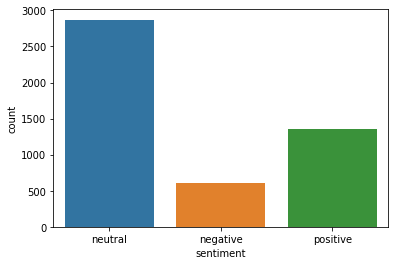

In [21]:
sns.countplot(df.sentiment)

In [22]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

In [0]:
train,eva = train_test_split(df,test_size = 0.2)

In [24]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [26]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 0.851523

/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Running loss: 0.640251

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.125615



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [28]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [29]:
result

{'eval_loss': 0.46498299181461333, 'mcc': 0.6649866912586784}

In [30]:
model_outputs

array([[ 0.6746746 , -2.287234  ,  1.295332  ],
       [-0.34229493, -2.0875516 ,  2.4219723 ],
       [ 1.9724884 , -1.5357624 , -0.5266869 ],
       ...,
       [-0.8932639 , -1.6582628 ,  2.5420067 ],
       [ 1.3628491 , -2.0851538 ,  0.2784313 ],
       [ 1.7979807 , -1.209714  , -0.7002428 ]], dtype=float32)

In [0]:
#wrong_predictions

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = eval_df['label'].tolist()
predicted = lst

In [35]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 74,   7,  22],
       [  2,  45,   4],
       [ 26,  14, 206]])

In [37]:
df_cm = pd.DataFrame(mat, range(3), range(3))
​sns.heatmap(df_cm, annot=True) 
plt.show()

SyntaxError: ignored

In [38]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.73      0.72      0.72       103\n     neutral       0.68      0.88      0.77        51\n    negative       0.89      0.84      0.86       246\n\n    accuracy                           0.81       400\n   macro avg       0.77      0.81      0.78       400\nweighted avg       0.82      0.81      0.81       400\n'

In [39]:
sklearn.metrics.accuracy_score(true,predicted)

0.8125

In [40]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return





## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")


neutral


In [41]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")



positive


In [42]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')



negative


In [44]:
## test on other headlines
get_result('Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic')


neutral


In [0]:
headline = 'Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic'
hl2 = 'Dow rises more than 900 points, books its biggest daily advance in 6 weeks on coronavirus vaccine hope'
hl3 = 'Trump Says He’s Taking Hydroxychloroquine to Prevent Getting Coronavirus'
hl4 = 'Nasdaq plans to toughen rules that could make it harder for Chinese companies to list on its exchange: report'

In [46]:
sentences = [headline, hl2, hl3, hl4]
for s in sentences:
    print(s)
    print(get_result(s))

Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic



neutral
None
Dow rises more than 900 points, books its biggest daily advance in 6 weeks on coronavirus vaccine hope



positive
None
Trump Says He’s Taking Hydroxychloroquine to Prevent Getting Coronavirus



neutral
None
Nasdaq plans to toughen rules that could make it harder for Chinese companies to list on its exchange: report



neutral
None


In [0]:
fp_hl1 = 'Alberta slashed its economic growth forecast'
fp_hl2 = "Crude price crisis hits Alberta's growth forecast"
fp_hl3 = 'Exploding demand for pot fuelling a jobs boom'

In [48]:
sentences = [fp_hl1, fp_hl2, fp_hl3]  ## all correct!!

for s in sentences:
    print(s)
    print(get_result(s))

Alberta slashed its economic growth forecast



negative
None
Crude price crisis hits Alberta's growth forecast



negative
None
Exploding demand for pot fuelling a jobs boom



positive
None


In [0]:
### further finetuning with econ-indicator-specific labels

In [0]:
## 
gdp_annotations_file = '/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/Bloomberg_final_agreed/Bloomberg_GDP_annotated_agreed.csv'

gdp_df = pd.read_csv(gdp_annotations_file, usecols = ['title','description','title_desc_sent_1','publishedAt'])

In [51]:
gdp_df

,title,description,title_desc_sent_1,publishedAt
0,Setback to Montreal retail reopening shows roc...,The high number of COVID-19 cases in Montreal ...,-1,5/4/2020
1,America’s longest economic expansion is over —...,"GPD falls 4.8%, consumer spending down most si...",-1,4/29/2020
2,Canada's AAA credit rating on the line as oil ...,Provinces are likely to need more assistance f...,-1,4/23/2020
3,‘Crisis like no other’: IMF warns ‘Great Lockd...,"In a further sign of pessimism, the IMF sketch...",-1,4/14/2020
4,Canada ekes out meagre growth in January befor...,Gross domestic product rose 0.1 per cent from ...,-1,3/31/2020
...,...,...,...,...
65,'It's a go for a July rate hike' after April G...,Canada’s economy showed unexpected strength in...,1,6/29/2018
66,U.S. first-quarter GDP growth revised down to ...,The U.S. economy expanded in the first quarter...,-1,6/28/2018
67,Canadian economy rebounds as oil and auto prod...,Canada’s economy rebounded more than economist...,1,5/1/2018
68,Loonie set for steepest weekly drop in a year ...,The Canadian dollar is heading for its worst w...,-1,3/2/2018


In [0]:
gdp_df['brief'] = gdp_df['title'] +'. '+ gdp_df['description'] 

In [55]:
gdp_df.head()

,title,description,title_desc_sent_1,publishedAt,brief
0,Setback to Montreal retail reopening shows roc...,The high number of COVID-19 cases in Montreal ...,-1,5/4/2020,Setback to Montreal retail reopening shows roc...
1,America’s longest economic expansion is over —...,"GPD falls 4.8%, consumer spending down most si...",-1,4/29/2020,America’s longest economic expansion is over —...
2,Canada's AAA credit rating on the line as oil ...,Provinces are likely to need more assistance f...,-1,4/23/2020,Canada's AAA credit rating on the line as oil ...
3,‘Crisis like no other’: IMF warns ‘Great Lockd...,"In a further sign of pessimism, the IMF sketch...",-1,4/14/2020,‘Crisis like no other’: IMF warns ‘Great Lockd...
4,Canada ekes out meagre growth in January befor...,Gross domestic product rose 0.1 per cent from ...,-1,3/31/2020,Canada ekes out meagre growth in January befor...


In [57]:
gdp_df['title_desc_sent_1'].value_counts()

-1    37
 1    23
 0    10
Name: title_desc_sent_1, dtype: int64

In [0]:
gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2)

In [59]:
## have to make them consistent with the previously trained dataset
# 0,1,2 : positive,negative,neutral
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
gdp_train['label'] = gdp_train['title_desc_sent_1'].apply(making_label)
gdp_eva['label'] = gdp_eva['title_desc_sent_1'].apply(making_label)


(3869, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [61]:
print(gdp_train.shape)
gdp_train.head()

(56, 6)


,title,description,title_desc_sent_1,publishedAt,brief,label
39,Global economy hits its weakest spell since fi...,The global economy’s sharp loss of speed throu...,-1,3/11/2019,Global economy hits its weakest spell since fi...,1
13,Euro Forecasters See a World-Beating Run in 2020,"(Bloomberg) — After two years of setbacks, the...",0,12/27/2019,Euro Forecasters See a World-Beating Run in 20...,2
4,Canada ekes out meagre growth in January befor...,Gross domestic product rose 0.1 per cent from ...,-1,3/31/2020,Canada ekes out meagre growth in January befor...,1
29,China's growth slides to weakest pace in almos...,China’s economy slowed to the weakest pace sin...,-1,7/14/2019,China's growth slides to weakest pace in almos...,1
30,Oil rebound drives Canada's best two-month GDP...,Canada recorded a second strong month of growt...,1,6/28/2019,Oil rebound drives Canada's best two-month GDP...,0


In [0]:
gdp_train_df = pd.DataFrame({
    'text': gdp_train['brief'].replace(r'\n', ' ', regex=True),
    'label': gdp_train['label']
})

gdp_eval_df = pd.DataFrame({
    'text': gdp_eva['brief'].replace(r'\n', ' ', regex=True),
    'label': gdp_eva['label']
})

In [66]:
gdp_train_df

,text,label
39,Global economy hits its weakest spell since fi...,1
13,Euro Forecasters See a World-Beating Run in 20...,2
4,Canada ekes out meagre growth in January befor...,1
29,China's growth slides to weakest pace in almos...,1
30,Oil rebound drives Canada's best two-month GDP...,0
19,Canada's economy grew at a slower-than-expecte...,1
16,Canada's economy slows even as business invest...,1
26,The Toronto Raptors' NBA playoff run helped bo...,0
18,Canadian economy faces a prolonged period of s...,1
40,Weak Canadian GDP data opens door for stimulus...,1


In [67]:
model.train_model(gdp_train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 1.094775



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [68]:
result, model_outputs, wrong_predictions = model.eval_model(gdp_eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [69]:
result

{'eval_loss': 0.9037080109119415, 'mcc': 0.5639451994956496}

In [70]:
model_outputs

array([[-0.965012  ,  1.1716905 ,  0.32982334],
       [ 2.0000916 , -0.442508  , -1.304214  ],
       [-0.7120627 ,  1.8373567 , -0.5377112 ],
       [-0.11752836,  1.7829447 , -1.1088178 ],
       [-0.59010875,  1.8700565 , -0.813662  ],
       [ 0.89319605,  1.3948793 , -1.3027693 ],
       [ 0.80822396, -1.1343802 ,  0.38105264],
       [-0.42354006,  1.8764133 , -0.81472325],
       [ 2.2901578 , -1.0498967 , -1.089127  ],
       [ 2.3407793 , -1.4370034 , -0.93991226],
       [ 2.1744256 , -1.7607597 , -0.5847191 ],
       [-0.19904383,  1.2144288 , -0.52454257],
       [-0.42044473,  1.9369813 , -1.0097402 ],
       [-0.2039131 ,  1.4121019 , -0.82896954]], dtype=float32)

In [0]:
#wrong_predictions

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = gdp_eval_df['label'].tolist()
predicted = lst

In [73]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[4, 0, 0],
       [0, 5, 0],
       [1, 4, 0]])

In [77]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.80      1.00      0.89         4
     neutral       0.56      1.00      0.71         5
    negative       0.00      0.00      0.00         5

    accuracy                           0.64        14
   macro avg       0.45      0.67      0.53        14
weighted avg       0.43      0.64      0.51        14



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
sklearn.metrics.accuracy_score(true,predicted)

0.6428571428571429

In [79]:
# test on same sentences above
sentences = [fp_hl1, fp_hl2, fp_hl3]  ## one incorrect, which is less related to GDP in keywords

for s in sentences:
    print(s)
    print(get_result(s))

Alberta slashed its economic growth forecast



negative
None
Crude price crisis hits Alberta's growth forecast



negative
None
Exploding demand for pot fuelling a jobs boom



negative
None


In [83]:
## error analysis

# 0,1,2 : positive,negative,neutral

for i, arr in enumerate(model_outputs):
    print(gdp_eval_df.iloc[i]['text'])
    print(arr)
    print("true label: ", gdp_eval_df.iloc[i]['label'])
    print("argmax predicted label: ",np.argmax(arr))

#observations: 4 errors are when true label is neutral(2), it predicts negative(1) 
# 1 error are when true label is neutral(2), it predicts positive(0)

## underlying reason of gold label 'neutral' are some common sense knowledge that are not from surface keywords
## too little training sample, cannot effectively learn 'GDP-specific' or 'Canada-specific'

Fed signals patience on rate moves ‘for some time’. No strong case to move in either direction
[-0.965012    1.1716905   0.32982334]
true label:  2
argmax label:  1
Trump predicts data will show U.S. economy in ‘terrific’ shape. U.S. President Donald Trump predicted data on Friday will show the U.S. economy is in “terrific” shape amid forecasts that growth topped 4 per cent in the second quarter, the fastest since 2014.
[ 2.0000916 -0.442508  -1.304214 ]
true label:  0
argmax label:  0
Nearly 1 million Canadians applied for jobless claims last week as economy rapidly deteriorates. The new figure of 929,000 — 5% of the labour force — includes claims made over the weekend, source says
[-0.7120627  1.8373567 -0.5377112]
true label:  1
argmax label:  1
Alberta oil cuts will slow Canadian economy next year, banks predict. BMO economists say gross domestic product could expand by 1.8 per cent next year, instead of the 2 per cent forecast previously
[-0.11752836  1.7829447  -1.1088178 ]
true 